In [80]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
#Domain:
  #Banking
#Context:
#This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability 
#customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department 
#to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#Attribute Information:
# ID : Customer ID
# Age : Customer's age in completed years
# Experience : #years of professional experience
# Income : Annual income of the customer ($000)
# ZIP Code : Home Address ZIP code.
# Family : Family size of the customer
# CCAvg : Avg. spending on credit cards per month ($000)
# Education : Education Level. 1: Undergrad; 2: Graduate;
 #3: Advanced/Professional
# Mortgage : Value of house mortgage if any. ($000)
# Personal Loan : Did this customer accept the personal loan offered in the
# last campaign?
# Securities Account : Does the customer have a securities account with the bank?
# CD Account : Does the customer have a certificate of deposit (CD)
 #account with the bank?
# Online : Does the customer use internet banking facilities?

In [82]:
#Load the data into a data-frame. The data-frame should have data and column description.
BankRaw = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print(BankRaw.columns)
print(BankRaw.shape)
BankRaw.head(10)
#Inference: The data set has 5000 data records spread across 14 column types

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [83]:
#Ensure the attribute types are correct. If not, take appropriate actions.
BankRaw.info(), BankRaw.dtypes
#Inference: This data set has nominal data such as ID, ZIP code  of type Int which can be execluded during analysis
# Categorical data-Personal Loan, Online, CD Account, Securities Account, Credit Card are already represented in binary format.
#Hence no further action is needed for these categorical variables
#Age, Income, Family are continuous variable holding intiger values and Education data has ranking and same is represented
#where as Experience,CCAvg,Mortgage are continuous variables which holds float (decimal) value
#No more further actions needed, all set to go further

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


(None, ID                      int64
 Age                     int64
 Experience              int64
 Income                  int64
 ZIP Code                int64
 Family                  int64
 CCAvg                 float64
 Education               int64
 Mortgage                int64
 Personal Loan           int64
 Securities Account      int64
 CD Account              int64
 Online                  int64
 CreditCard              int64
 dtype: object)

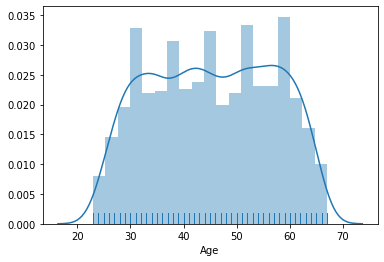

In [84]:
#Univariate analysis
#Analyzing the distribution of independent variables one by one below
sns.distplot(BankRaw['Age'], rug=True)
#Inference: Age has multiple modes and it is symmerically distributed

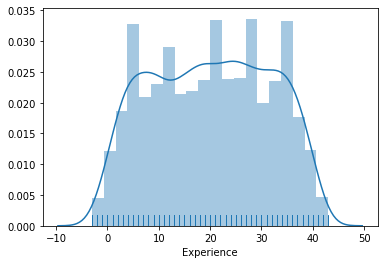

In [85]:
sns.distplot(BankRaw['Experience'], rug=True)
#Inference: Experience has multiple modes and it is symmerically distributed. Could see few negetive values as well

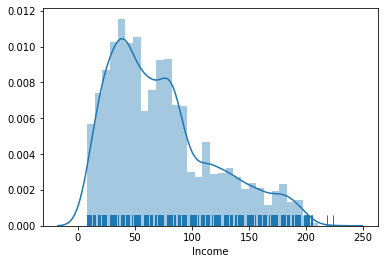

In [86]:
sns.distplot(BankRaw['Income'], rug=True)
#Inference: Income is right skewed, indicates the presence of outliers

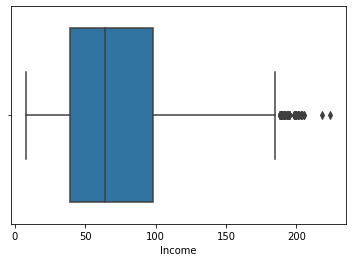

In [87]:
sns.boxplot(BankRaw['Income'])
#From below analysis, it is evident that Income has outliers.Hence this needs to be replaced with median

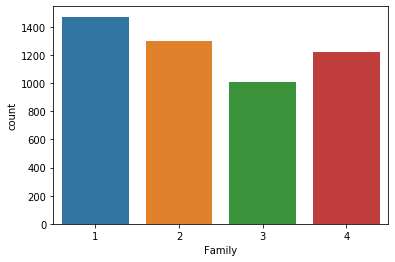

In [88]:
sns.countplot(BankRaw['Family'])
# Inference: Data is some what equally distibuted across different family groups(3 memeber family count is less in the entire data set)

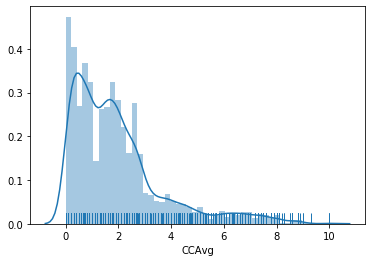

In [89]:
sns.distplot(BankRaw['CCAvg'], rug=True)
#Inference: CCAvg is right skewed, indicates presence of outliers

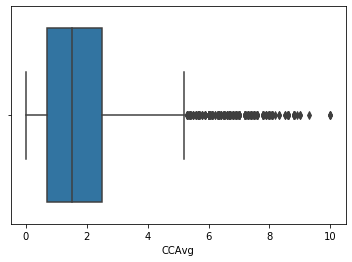

In [90]:
#CCAvg has outliers which needs to be replaced with median
sns.boxplot(BankRaw['CCAvg'])

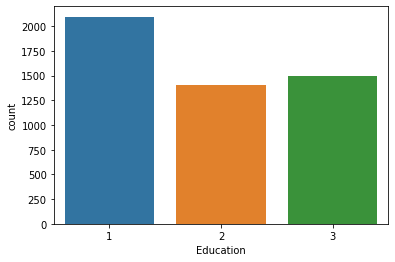

In [91]:
sns.countplot(BankRaw['Education'])
#Inference: Data is spread some what equally between education level 2 and 3 
#where as customers which education level 1 has more presence in given dataset

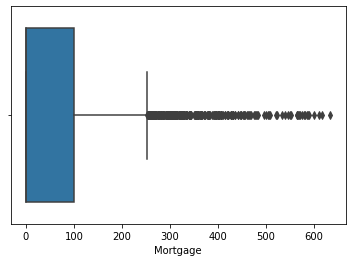

In [92]:
sns.boxplot(BankRaw['Mortgage'])
#Mortgage has outliers which needs to be analyzed further

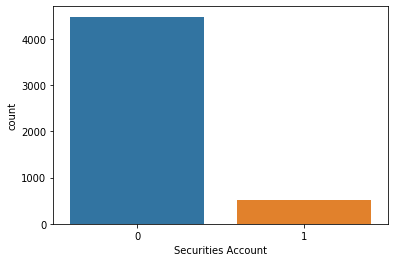

In [93]:
sns.countplot(BankRaw['Securities Account'])
#Inference: From below data it is evident that mejority of customers does not have security account

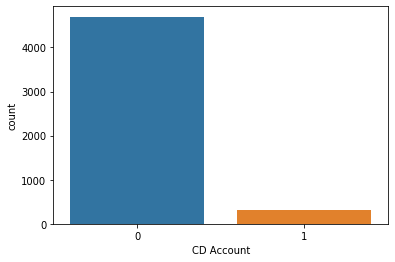

In [94]:
sns.countplot(BankRaw['CD Account'])
#Inference: From below data we can conclucde that majority of customers does not have CA Account

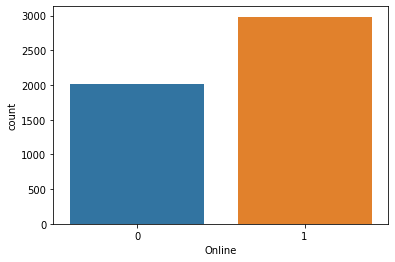

In [95]:
sns.countplot(BankRaw['Online'])
#Inference: Overall more customers are having online access 

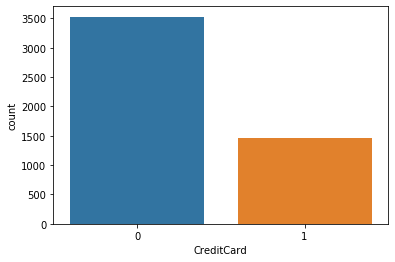

In [96]:
sns.countplot(BankRaw['CreditCard'])
#Inference: customers having credit card is less in given data set as per below graph

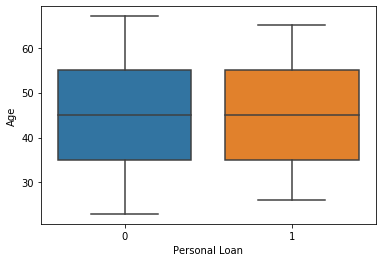

In [97]:
#Multivariate analysis
#Data Distribution of 'Personal Loan' (ie., target variable) across all variables is analyzed through byvariate analysis in below section. 
#Nominal data sets ie., ID, ZIP code are skipped from this analysis
sns.boxplot(BankRaw['Personal Loan'], BankRaw['Age'])
#Inference: Target variable has equal presence across age groups ranging between 35-55 years

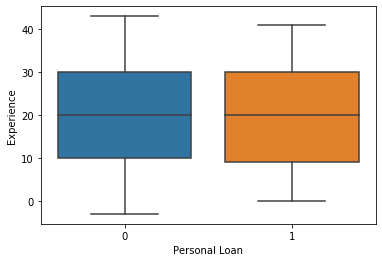

In [98]:
sns.boxplot(BankRaw['Personal Loan'], BankRaw['Experience'])
#Inference: Target variable has equal presence across different experiance groups ranging between 10-30 years

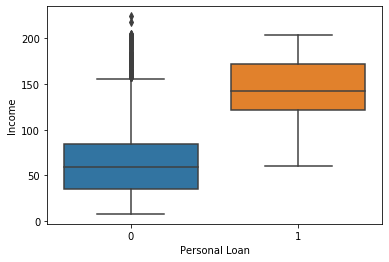

In [99]:
sns.boxplot(BankRaw['Personal Loan'], BankRaw['Income'])
#Inference: Target variable has more presence with customers with high income. 

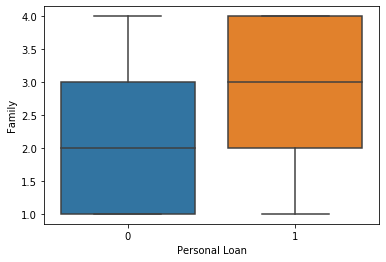

In [100]:
sns.boxplot(BankRaw['Personal Loan'], BankRaw['Family'])
#Inference: As family size increased (range=2-4 members), more customers opted for Personal Loan

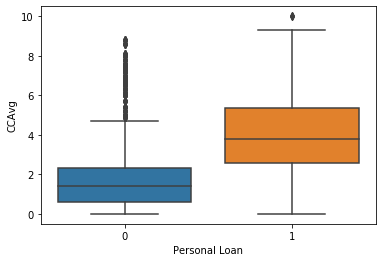

In [101]:
sns.boxplot(BankRaw['Personal Loan'], BankRaw['CCAvg'])
#Inference: Between 3-5 CCAvg, more customer opted for Personal Loan. Shows the presence of outliers


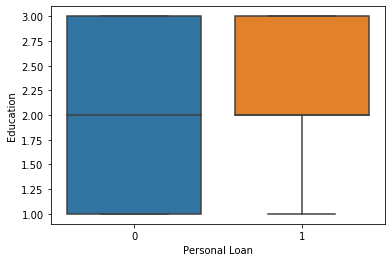

In [102]:
#sns.countplot(BankRaw['Education'])
sns.boxplot(BankRaw['Personal Loan'], BankRaw['Education'])
#Inference: Customers opted for Personal Loan have education level between 2-3


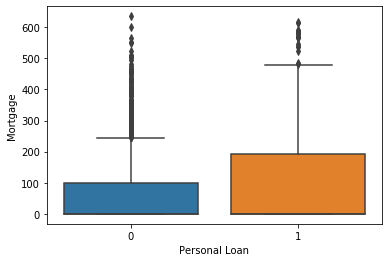

In [103]:
sns.boxplot(BankRaw['Personal Loan'], BankRaw['Mortgage'])
#Inference: As mortgage increases, presence of personal loan (target variable) descreases 
#and outliers are present 

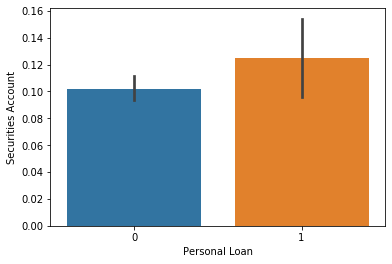

In [104]:
sns.barplot(BankRaw['Personal Loan'], BankRaw['Securities Account'])
#sns.countplot(BankRaw['Securities Account'])
#Inference: Presence of target variable is some what equally spread across Securities Account

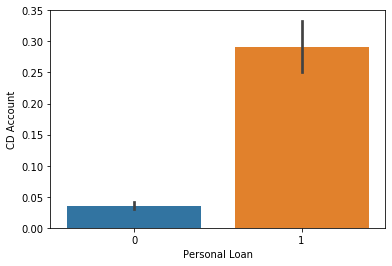

In [105]:
sns.barplot(BankRaw['Personal Loan'], BankRaw['CD Account'])
#Inference: More customers with CD account opted for Personal Loan

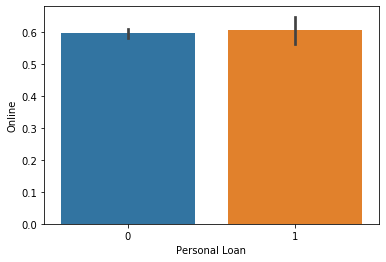

In [106]:
sns.barplot(BankRaw['Personal Loan'], BankRaw['Online'])
#Inference: Target variable has equal presence w.r.t Online variable

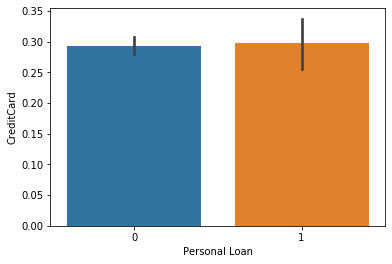

In [107]:
sns.barplot(BankRaw['Personal Loan'], BankRaw['CreditCard'])
#Inference: Target variable has equal presence w.r.t CreditCard variable

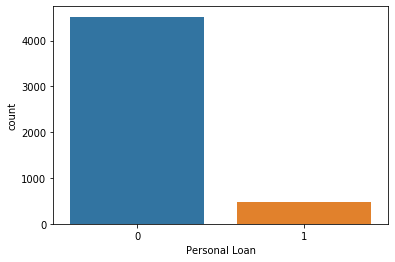

In [108]:
#Target Column Distribution - In our case 'Personal Loan' is Target Variable
sns.countplot(BankRaw['Personal Loan'])
#Inference: Very less customers have opted for personal loan so far in the given dataset

(False, False, <matplotlib.axes._subplots.AxesSubplot at 0x1a252e7950>)

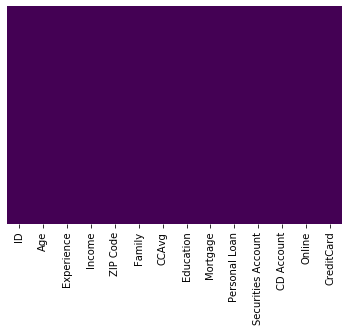

In [109]:
#Strategies to address the different data challenges such as data pollution, outliers and missing values.
BankRaw.isna().sum()
BankRaw.isnull().values.any(),BankRaw.isna().values.any()
BankRaw.isnull().values.any(),BankRaw.isna().values.any(),sns.heatmap(BankRaw.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Based on below outcome, we can conclude that there is no null or NAN Values in the data set.

In [110]:
BankRaw.describe().transpose()
#Analyzing below data:
#Min experiance is mentioned as -3, a negetive number which is incorrect. Hence this should be anlyzed further
#Mortgage is showing variation in standard deviation, we will analyze it further.
#From bivariate analysis we could see that Mortgage, CCAvg and Income has outliers 

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [111]:
#Checking for Mortgage Value which is > 250. These values will be outliers as per boxplot analysis
BankRaw[BankRaw['Mortgage']>250]. describe().transpose()
#From this analysis we can conclude that there are 299 reacords having 'Mortgage' value as outliers. 

,count,mean,std,min,25%,50%,75%,max
ID,299.0,2469.889632,1385.488077,23.0,1298.5,2499.0,3617.0,4964.0
Age,299.0,44.695652,11.256513,23.0,35.0,44.0,54.0,65.0
Experience,299.0,19.551839,11.150578,-1.0,10.0,20.0,28.0,41.0
Income,299.0,127.979933,38.659496,61.0,94.0,122.0,161.5,205.0
ZIP Code,299.0,93195.257525,1785.249345,90007.0,91946.0,93555.0,94608.0,96150.0
Family,299.0,2.137124,1.067170,1.0,1.0,2.0,3.0,4.0
CCAvg,299.0,3.040569,2.223273,0.0,1.3,2.6,4.3,9.0
Education,299.0,1.709030,0.834824,1.0,1.0,1.0,2.0,3.0
Mortgage,299.0,352.869565,88.140140,251.0,287.0,326.0,400.0,635.0
Personal Loan,299.0,0.317726,0.466373,0.0,0.0,0.0,1.0,1.0


In [112]:
#We can replace these values with median of mortgage
BankRaw.Mortgage.median()

0.0

In [113]:
#Replacing the outliers with median value ie., 0.0 in this case
BankRaw["Mortgage"]=np.where(BankRaw["Mortgage"]>250, 0.0,BankRaw['Mortgage'])

In [114]:
#Checking if the outliers is replaced correctly
BankRaw[BankRaw['Mortgage']<=250]. describe().transpose()
# We can conclude that  after replacing the outliers, all 5000 records have Mortgage <=250 and
#std has reduced significantly and it is in range

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,35.397200,66.140229,0.0,0.00,0.0,0.00,250.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [115]:
#Checking if experience is less than 0 which is cannot be the real time scenario
BankRaw[BankRaw['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0.0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0.0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0.0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89.0,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0.0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176.0,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,0.0,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0.0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0.0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0.0,0,1,0,0,1


In [116]:
BankRaw[BankRaw['Experience']<0].count()
#There are 52 records having experience as -ve values. 

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [119]:
BankRaw[BankRaw['Experience']<0].describe().transpose()
#From below data, it is evident that Experience is marked as -ve for age group <30 years.
# Hence we will replace these negetive values of Experience with median experience of age group <30

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIP Code,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,26.769231,65.343921,0.0,0.00,0.0,0.000,241.0
Personal Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


In [120]:
BankRaw1=BankRaw[BankRaw['Age']<30]
BankRaw1.Experience.median()
#So meadian experience of customers with Age<30 is 2.Lets replace this value for all negetive experiences

2.0

In [121]:
#Replacing the -ve experience with median value  mentioned above ie., 2.0 in this case
BankRaw["Experience"]=np.where(BankRaw["Experience"]<0, 2.0,BankRaw['Experience'])

In [122]:
#Checking if the outliers is replaced correctly
BankRaw[BankRaw['Experience']>=0]. describe().transpose()
# We can conclude that  after replacing the -ve, all 5000 records have Experience >=0 and
#No negeitive values are found

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.140400,11.405644,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,35.397200,66.140229,0.0,0.00,0.0,0.00,250.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [123]:
# Similarly replacing the outliers for columns CCAvg > 5 and Income>180 with respective median values.
BankRaw.CCAvg.median(), BankRaw.Income.median()

(1.5, 64.0)

In [124]:
BankRaw[BankRaw['CCAvg']>5].count(),BankRaw[BankRaw['Income']>180].count()
#346 records of CCAvg has outliers and 150 records of Income has outliers

(ID                    346
 Age                   346
 Experience            346
 Income                346
 ZIP Code              346
 Family                346
 CCAvg                 346
 Education             346
 Mortgage              346
 Personal Loan         346
 Securities Account    346
 CD Account            346
 Online                346
 CreditCard            346
 dtype: int64, ID                    150
 Age                   150
 Experience            150
 Income                150
 ZIP Code              150
 Family                150
 CCAvg                 150
 Education             150
 Mortgage              150
 Personal Loan         150
 Securities Account    150
 CD Account            150
 Online                150
 CreditCard            150
 dtype: int64)

In [125]:
BankRaw["CCAvg"]=np.where(BankRaw["CCAvg"]>5, 1.5,BankRaw['CCAvg'])
BankRaw["Income"]=np.where(BankRaw["Income"]>180, 64.0,BankRaw['Income'])

In [126]:
BankRaw.describe().transpose()
#From below data, we can conclude that all outliers are replaced with respective median values

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.140400,11.405644,0.0,10.00,20.0,30.00,43.0
Income,5000.0,69.980000,41.197998,8.0,39.00,64.0,91.00,180.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.575418,1.125338,0.0,0.70,1.5,2.20,5.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,35.397200,66.140229,0.0,0.00,0.0,0.00,250.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [127]:
BankRaw.corr()
#From below data, we can analyze the Income,CCAvg, CD Account ,Education has considerable + influence on target variable Personal Loan
#and Mortgage has -ve influence on target variable Personal Loan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008383,-0.018094,0.013432,-0.016797,0.004169,0.021463,-0.017069,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993922,-0.042154,-0.029216,-0.046418,-0.028952,0.041334,-0.002302,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008383,0.993922,1.000000,-0.033861,-0.028795,-0.051627,-0.031311,0.014003,-0.002681,-0.008477,-0.001049,0.009614,0.013944,0.008915
Income,-0.018094,-0.042154,-0.033861,1.000000,-0.015924,-0.148178,0.428020,-0.189003,-0.094419,0.432136,0.006041,0.142173,0.011567,-0.002479
ZIP Code,0.013432,-0.029216,-0.028795,-0.015924,1.000000,0.011778,-0.005845,-0.017377,0.006597,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051627,-0.148178,0.011778,1.000000,-0.062663,0.064929,0.037938,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,0.004169,-0.028952,-0.031311,0.428020,-0.005845,-0.062663,1.000000,-0.065362,-0.031083,0.261052,0.018178,0.077001,-0.015181,-0.005979
Education,0.021463,0.041334,0.014003,-0.189003,-0.017377,0.064929,-0.065362,1.000000,0.019163,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.017069,-0.002302,-0.002681,-0.094419,0.006597,0.037938,-0.031083,0.019163,1.000000,-0.055123,-0.003959,-0.008949,-0.011394,-0.001168
Personal Loan,-0.024801,-0.007726,-0.008477,0.432136,0.000107,0.061367,0.261052,0.136722,-0.055123,1.000000,0.021954,0.316355,0.006278,0.002802


In [128]:
# Droping ID and ZIP code columns as they are just identifiers (Nominal data)
Bank=BankRaw.drop('ZIP Code',axis=1)
Bank=Bank.drop('ID',axis=1)

In [129]:
#Create the training set and test set in ration of 70:30
#Importing required libaries
from sklearn.model_selection import train_test_split
import os
#Drop the target 'Personal Loan' from data
x=Bank.drop('Personal Loan',axis=1)
y=Bank['Personal Loan']
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=0)
x_train,x_test,y_train,y_test

#From the below data we can conclude that data is split as 3500: 1500 which is 70:30 ratio.

(      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
 2858   36        11.0   158.0       2    1.5          1     114.0   
 1559   59        35.0   102.0       4    3.0          2     115.0   
 1441   58        33.0    43.0       2    1.6          3       0.0   
 2179   49        23.0    68.0       1    1.5          2       0.0   
 1390   29         3.0    80.0       4    1.8          2       0.0   
 ...   ...         ...     ...     ...    ...        ...       ...   
 4931   57        27.0    55.0       1    1.4          3       0.0   
 3264   67        41.0   114.0       4    2.4          3       0.0   
 1653   26         1.0    24.0       2    0.9          3     123.0   
 2607   57        33.0    49.0       4    1.5          1     214.0   
 2732   33         9.0    38.0       1    2.1          3     133.0   
 
       Securities Account  CD Account  Online  CreditCard  
 2858                   0           0       1           1  
 1559                   0           0 

In [130]:
#Transform the data i.e. scale / normalize if required
# Feature Scaling as we have variables in different scale (Ex: Age, Income, Mortgae etc.,)
#Also all categorical variables as  represented in binary so good to scale it
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [131]:
#First create Logistic Regression algorithm. Note the model performance.
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state = 0)
logmodel.fit(x_train,y_train)

/Users/chai3/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
# Predicting the Test set results
y_pred = logmodel.predict(x_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_LogR = confusion_matrix(y_test, y_pred)
cm_LogR

array([[1356,   16],
       [  61,   67]])

In [133]:
# Compute ROC curve and area the curve for logistic
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc), 
fpr, tpr, thresholds

Area under the ROC curve : 0.755888


(array([0.        , 0.01166181, 1.        ]),
 array([0.       , 0.5234375, 1.       ]),
 array([2, 1, 0]))

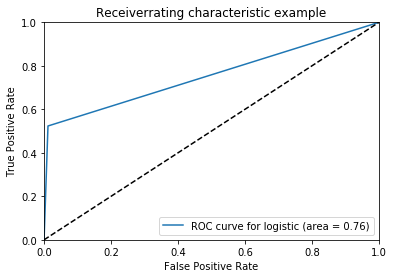

In [134]:
# Plot ROC curve
import pylab as pl
pl.clf()
pl.plot(fpr, tpr, label='ROC curve for logistic (area = %0.2f)' % roc_auc)
#pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [135]:
#calculate the fpr and tpr for all thresholds of the classification
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

        fpr       tpr     1-fpr        tf  thresholds
1  0.011662  0.523438  0.988338 -0.464901           1


In [137]:
#Print Best accuracy and Best Parameters using Confusion Matrix 
#Print Classification Report to check precision, recall & F1 Score

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#Analysis:
#Precision: How consistency model identified the value. 
   #In this case it is 96% consistently identified for loan rejecters and 81% consistent in case of loan accepters.
# Recall: How much accurately model is indetifying the value.
   # In this case, it is 99% accurate in identifying the loan rejecters and 52% accurate in identifying the loan accepters
 #FL score is over all measure of consistency and accuracy of given model
   #In this case it is overall 97% accurate and consistent in identifying the loan rejecters
    #and overall 64% accurate and consistent in identifying the loan accepters
#From the below classification report, FPR=1-Specificity, (1-0.99)=0.01,nothing but false postive rate is 1%
# From the below classification report TPR=Sensitivity=0.51,nothing but true postive rate is 51%
#Overall accuracy of model is 95%
#Inference: Based on below report We could conclude below things:
#1. Model is identifying correctly 99% of customers who may reject the personal loan if offerred to them. 
    #Hence model is good in idenifying the customers who may tend to reject the loan offered as precision and recall is high for value 'O'
#2. Model is identifying correctly 52% as potential customers who may opt for personal loan if offered. 
    # Precision and recall value for potential loan accepters is not that great.

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.81      0.52      0.64       128

    accuracy                           0.95      1500
   macro avg       0.88      0.76      0.80      1500
weighted avg       0.94      0.95      0.94      1500



In [138]:
#Logistic Regression with Hyper Parameter Tuning using GridSearchCV
# This is N/A as Hyper parameter is not applicable for logistic regression but it is applicable for KNN/SVM etc

In [139]:
#Build KNN algorithm and explain why that algorithm in the comment lines.
#Explaination:
#KNN works assuming the similariy between the different data and also it works based on voting of its neighbours. 
#Works good in case of continuous data
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNNModel = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNModel.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [140]:
# Predicting the Test set results
y_pred = KNNModel.predict(x_test)
#Print Best accuracy and Best Parameters using Confusion Matrix 
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_KNN = confusion_matrix(y_test, y_pred)
cm_KNN

array([[1362,   10],
       [  64,   64]])

In [144]:
#Print Classification Report to check precision, recall & F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
#Precision: How consistency model identified the value. 
   #In this case it is 96% consistently identified for loan rejecters and 86% consistent in case of loan accepters.
# Recall: How much accurately model is indetifying the value.
   # In this case, it is 99% accurate in identifying the loan rejecters and 50% accurate in identifying the loan accepters
 #FL score is over all measure of consistency and accuracy of given model
   #In this case it is overall 97% accurate and consistent in identifying the loan rejecters
    #and overall 63% accurate and consistent in identifying the loan accepters
#From the below classification report, FPR=1-Specificity, (1-0.99)=0.01,nothing but false postive rate is 1%
# From the below classification report TPR=Sensitivity=0.51,nothing but true postive rate is 51%
#Overall Accuracy of model is 95%
#Inference: Based on below report We could conclude below things:
#1. Model is identifying correctly 99% of customers who may reject the personal loan if offerred to them. 
    #Hence model is good in idenifying the customers who may tend to reject the loan offered as precision and recall is high for value 'O'
#2. Model is identifying correctly 50% as potential customers who may opt for personal loan if offered. 
    # Precision and recall value for potential loan accepters is not that great.

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.86      0.50      0.63       128

    accuracy                           0.95      1500
   macro avg       0.91      0.75      0.80      1500
weighted avg       0.95      0.95      0.94      1500



In [145]:
#K-Nearest Neighbour with Hyper Parameter Tuning using GridSearchCV. 
scores=[]
for k in range(1,50):
    Model = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    Model.fit(x_train,y_train)
    scores.append(Model.score(x_test,y_test))

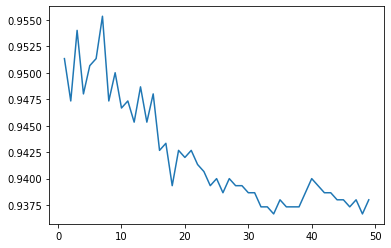

In [146]:
#Using Grid Search to identify optimum value for K.
plt.plot (range(1,50),scores)
#From below graph, we can assume that K~7, model performance could be good.

In [147]:
#Rebuild the KNN using the optimum value to achieve best accuracy 
from sklearn.neighbors import KNeighborsClassifier
KNNModel = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
KNNModel.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [148]:
# Predicting the Test set results
y_pred = KNNModel.predict(x_test)
#Print Best accuracy and Best Parameters using Confusion Matrix 
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_KNN = confusion_matrix(y_test, y_pred)
cm_KNN

array([[1366,    6],
       [  61,   67]])

In [150]:
#Build classification report and explain recall, precision and F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#Precision: How consistency model identified the value. 
   #In this case it is 96% consistently identified for loan rejecters and 92% consistent in case of loan accepters.
# Recall: How much accurately model is indetifying the value.
   # In this case, it is 100% accurate in identifying the loan rejecters and 52% accurate in identifying the loan accepters
 #FL score is over all measure of consistency and accuracy of given model
   #In this case it is overall 98% accurate and consistent in identifying the loan rejecters
    #and overall 67% accurate and consistent in identifying the loan accepters
#Overall accuracy of model is 96%
#Inference: From the below report, with rebuild KNN model with k=7, we could see that performance of the model 
#has increased slightly in identifying the potential loan accepters. Also model is capable of identifying more accurately
#the potential loan rejecters at k=7
#So we can conclude that, at k=7 model is optimized


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1372
           1       0.92      0.52      0.67       128

    accuracy                           0.96      1500
   macro avg       0.94      0.76      0.82      1500
weighted avg       0.95      0.96      0.95      1500



In [151]:
#Build Naive Bayes Classifier on training Dataset and explain why that algorithm in the comment lines

#Explaination:
#Naive Bayes factors all available evidence in form of predictors into the naïve Bayes rule to obtain more accurate
#probability for class prediction.
#It estimates conditional probability which is the probability that something will happen, given that something
#else has already occurred. 

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
NBModel = GaussianNB()
NBModel.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [152]:

# Predicting the Test set results
y_pred = NBModel.predict(x_test)

In [153]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, y_pred)
cm_NB

array([[1306,   66],
       [  80,   48]])

In [155]:
#Print the accuracy of the model & confusion Matrix for Naïve Bayes Model.
#Firstly, calculate the probabilities of predictions made & then plot the ROC Curve

#Explain Precision, Recall value & F1 Score using the classification report
#Calculate the fpr and tpr for all thresholds of the classification.

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#Analysis:

#Precision: How consistency model identified the value. 
   #In this case it is 94% consistently identified for loan rejecters and 42% consistent in case of loan accepters.
# Recall: How much accurately model is indetifying the value.
   # In this case, it is 95% accurate in identifying the loan rejecters and 38% accurate in identifying the loan accepters
 #FL score is over all measure of consistency and accuracy of given model
   #In this case it is overall 95% accurate and consistent in identifying the loan rejecters
    #and overall 40% accurate and consistent in identifying the loan accepters
#From the below classification report, FPR=1-Specificity, (1-0.95)=0.05,nothing but false postive rate is 5%
# From the below classification report TPR=Sensitivity=0.38,nothing but true postive rate is 38%
#Overall accuracy of model is 90%
#Inference: Based on below report We could conclude below things:
#1. Model is identifying correctly 95% of customers who may reject the personal loan if offerred to them. 
    #Hence model is good in identifying the customers who may tend to reject the loan offered as precision and recall is high for value 'O'
#2. Model is identifying correctly 38% as potential customers who may opt for personal loan if offered. 
    # Precision and recall value for potential loan accepters is not that great.

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1372
           1       0.42      0.38      0.40       128

    accuracy                           0.90      1500
   macro avg       0.68      0.66      0.67      1500
weighted avg       0.90      0.90      0.90      1500



In [156]:
# Overall conclusion is that KNN model with K=7 is better model compared to KNN with K=5,Logistic Regression and NB model evaluated above.
# The hyper parameter selected here is K, which indicates the number of neighbours picked in given data set (randoma state=0) for given customer to analyze the similarity.
#As per the concluded best model, i.e., KNN (at k=7), we can suggest the bank to taregt around 52% 
#who could be potential customers who may accept Personal Loan offered by bank
#Also from end user standpoint (ie., Bank customer in this case), it makes sense to go with KNN model as majority of 
# customers who opt for personal loan will have lot of similarity as loan requirement/need will be driven by factors such Income, Family Size, Work Experience etc., 

In [ ]:
#Belo topics are yet to covered in the class. (Tried to plot the RoC for logistic regression above as I could find some additional references)
#Roc Curve for Model evaluation and explain the difference among all the models used in your analysis
#egularization techniques used for the model.
#Range estimate at 95% confidence for the model performance in production.
#Roc Curve for Model evaluation and explain the difference among all the models used in your analysis
#Firstly, calculate the probabilities of predictions made & then plot the ROC Curve